## k-nearest-neighbor algorithm in plain Python

The k-nn algorithm is a simple **supervised** machine learning algorithm that can be used both for classification and regression. It's an **instance-based** algorithm. So instead of estimating a model, it stores all training examples in memory and makes predictions using a similarity measure. 

Given an input example, the k-nn algorithm retrieves the k most similar instances from memory. Similarity is defined in terms of distance, that is, the training examples with the smallest (euclidean) distance to the input example are considered to be most similar.

The target value of the input example is computed as follows:  
  
Classification:  
a) unweighted: output the most common classification among the k-nearest neighbors  
b) weighted: sum up the weights of the k-nearest neighbors for each classification value, output classification with highest weight  
  
Regression:  
a) unweighted: output the average of the values of the k-nearest neighbors  
b) weighted: for all classification values,  sum up classification value$*$weight and divide the result trough the sum of all weights  

The weighted k-nn version is a refined version of the algorithm in which the contribution of each neighbor is *weighted* according to its distance to the query point. Below, we implement the basic unweighted version of the k-nn algorithm for the digits dataset from sklearn.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
np.random.seed(123)

# % matplotlib inline

## k-nearest-neighbor class

In [3]:
# Nearest neighbor implementation using L1 distance as the similarity measure.
# example from CS231n
class NearestNeighbor:
    def __init__(self):
        pass
    
    def train(self, X: np.array, y: np.array) -> None:
        """
        train function: memorize all data and labels
        :param X: N*D where each row is an example, Y is 1-dimension of size N 
        """
        self.data = X
        self.targets = y
        
    def predict(self, X: np.array, k=1, use_l1_distance: bool = True) -> np.array:
        """
        predict function: predict the label of the most similar training image.
        :param X: N*D where each row is an example we wish to predict the label for.
        :param k: hyper parameter k closes neighbors, very problem/dataset-dependent.
        :param use_l1_distance: whether to use l1 distance or not.
        """
        n_samples, _ = X.shape
        # lets make sure that the output type matches the input type
        y_preds = np.zeros(n_samples, dtype=self.targets.dtype)

        for i in range(n_samples):
            if use_l1_distance:
                distances = self._l1_distances(X[i])
            else:
                distances = self._l2_distances(X[i])
            
            # optimization: instead of copying label from nearest neighbors, 
            # take majority vote from k cloest points
#             min_index = np.argmin(distances) # get the index with the smallest distance
#             y_preds[i] = self.targets[min_index] # predict the label of the nearest example
            knn = np.argsort(distances)[:k]
            y_knn = self.targets[knn]
            max_vote = max(y_knn, key=list(y_knn).count)
            y_preds[i] = max_vote
            
        return y_preds
        
    def _l1_distances(self, X):
        """
        computes the l1 distance between training data and a new input example X
        :param X: 1-dimension of size N
        """
        l1_distances = np.sum(np.abs(self.data - X), axis=1)
        return l1_distances
    
    def _l2_distances(self, X):
        """
        computes the l2 distance between training data and a new input example X
        :param X: 1-dimension of size N
        """
        l2_distances = np.sqrt(np.sum((self.data - X)**2, axis=1))
        return l2_distances
    
# Q: with N examples, how fast are training and prediction?
# A: Train O(1), Predict O(N)
# This is bad, since we want classifiers that're fast at prediction; slow for training is ok

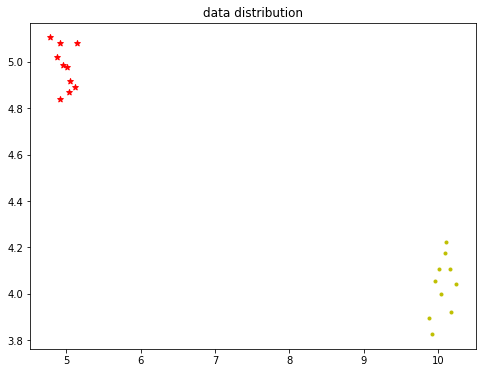

X_train shape: (20, 2)
y_train shape: (20, 1)
Testing one datapoint, k=1
Predicted label: [0. 0. 1. 1.]
True label: [[0]
 [0]
 [1]
 [1]]


In [5]:
import matplotlib.pyplot as plt

# Test case
data1 = np.random.normal(loc=(10, 4), scale=0.1, size=(10, 2))
label1 = np.ones((10, 1))
data2 = np.random.normal(loc=(5, 5), scale=0.1, size=(10, 2))
label2 = np.zeros((10, 1))
X_train = np.vstack((data1, data2))
y_train = np.vstack((label1, label2))
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

# visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(data1[:, 0], data1[:, 1], marker='.', c='y')
plt.scatter(data2[:, 0], data2[:, 1], marker='*', c='r')
plt.title("data distribution")
plt.show()

# train & predict
knn = NearestNeighbor()
knn.train(X_train, y_train)
print("Testing one datapoint, k=1")
X_test = np.array([[6, 6], [4, 4], [9, 5], [8, 6]])
y_test = np.array([[0], [0], [1], [1]])
print(f"Predicted label: {knn.predict(X_test, k=2, use_l1_distance=False)}")
print(f"True label: {y_test}")

## Dataset

X_train shape: (1347, 64)
y_train shape: (1347,)
X_test shape: (450, 64)
y_test shape: (450,)


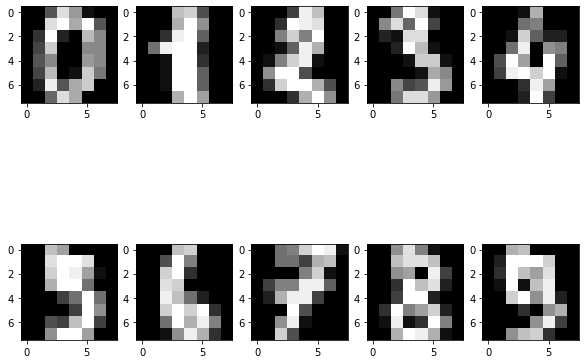

Testing one datapoint, k=1
Predicted label: [7 6 1 9 2 7 2 7 3 4]
True label: [7 6 1 9 2 7 2 7 3 4]


In [12]:
# Test 2
# We will use the digits dataset as an example. It consists of the 1797 images of hand-written digits. Each digit is
# represented by a 64-dimensional vector of pixel values.

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Example digits
fig = plt.figure(figsize=(10,8))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.imshow(X[i].reshape((8,8)), cmap='gray')
    
plt.show()

knn_l1 = NearestNeighbor()
knn_l1.train(X_train, y_train)
print("Testing one datapoint, k=1")
print(f"Predicted label: {knn_l1.predict(X_test[0:10], k=3, use_l1_distance=True)}")
print(f"True label: {y_test[0:10]}")

In [ ]:
class kNN():
    def __init__(self):
        pass

    def fit(self, X, y):
        self.data = X
        self.targets = y

    def euclidean_distance(self, X):
        """
        Computes the euclidean distance between the training data and
        a new input example or matrix of input examples X
        """
        # input: single data point
        if X.ndim == 1:
            data = (self.data - X)**2
#             print("data shape: {}".format(data.shape))
            l2 = np.sqrt(np.sum(data, axis=1))

        # input: matrix of data points
        if X.ndim == 2:
            n_samples, _ = X.shape
            l2 = [np.sqrt(np.sum((self.data - X[i])**2, axis=1)) for i in range(n_samples)]

        return np.array(l2)

    def predict(self, X, k=1):
        """
        Predicts the classification for an input example or matrix of input examples X
        """
        # step 1: compute distance between input and training data
        dists = self.euclidean_distance(X)
#         print("dists shape: {}".format(dists.shape))

        # step 2: find the k nearest neighbors and their classifications
        if X.ndim == 1:
            knn = np.argsort(dists)[:k]
            y_knn = self.targets[knn]
            max_vote = max(y_knn, key=list(y_knn).count)
            return max_vote

        if X.ndim == 2:
            knn = np.argsort(dists)[:, :k]
            y_knn = self.targets[knn]
            n_samples, _ = X.shape
            max_votes = [max(y_knn[i], key=list(y_knn[i]).count) for i in range(n_samples)]
            return max_votes

## Initializing and training the model

In [14]:
knn = kNN()
knn.fit(X_train, y_train)

print("Testing one datapoint, k=1")
print(f"Predicted label: {knn.predict(X_test[0], k=1)}")
print(f"True label: {y_test[0]}")
print()
print("Testing one datapoint, k=5")
print(f"Predicted label: {knn.predict(X_test[20], k=5)}")
print(f"True label: {y_test[20]}")
print()
print("Testing 10 datapoint, k=1")
print(f"Predicted labels: {knn.predict(X_test[5:15], k=1)}")
print(f"True labels: {y_test[5:15]}")
print()
print("Testing 10 datapoint, k=4")
print(f"Predicted labels: {knn.predict(X_test[5:15], k=4)}")
print(f"True labels: {y_test[5:15]}")
print()

Testing one datapoint, k=1
dists shape: (1347,)
Predicted label: 3
True label: 3

Testing one datapoint, k=5
dists shape: (1347,)
Predicted label: 9
True label: 9

Testing 10 datapoint, k=1
dists shape: (10, 1347)
Predicted labels: [3, 1, 0, 7, 4, 0, 0, 5, 1, 6]
True labels: [3 1 0 7 4 0 0 5 1 6]

Testing 10 datapoint, k=4
dists shape: (10, 1347)
Predicted labels: [3, 1, 0, 7, 4, 0, 0, 5, 1, 6]
True labels: [3 1 0 7 4 0 0 5 1 6]



## Accuracy on test set

In [7]:
# Compute accuracy on test set
y_p_test1 = knn.predict(X_test, k=1)
test_acc1= np.sum(y_p_test1[0] == y_test)/len(y_p_test1[0]) * 100
print(f"Test accuracy with k = 1: {format(test_acc1)}")

y_p_test5 = knn.predict(X_test, k=5)
test_acc5= np.sum(y_p_test5 == y_test)/len(y_p_test5) * 100
print(f"Test accuracy with k = 5: {format(test_acc5)}")

Test accuracy with k = 1: 99.11111111111111
Test accuracy with k = 5: 98.66666666666667
